# Imports


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt


# Leitura dos dados

In [38]:
dataset = pd.read_csv('dataset/House_Rent_Dataset.csv')
dataset.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Pré-processamento

## Análise exploratória dos dados

### Informações gerais dos dados

In [39]:
dataset.shape

(4746, 12)

In [40]:
dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [42]:
dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [43]:
dataset.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [44]:
print(f"Duplicados: {int(dataset.duplicated().sum())}")

Duplicados: 0


### Gráficos

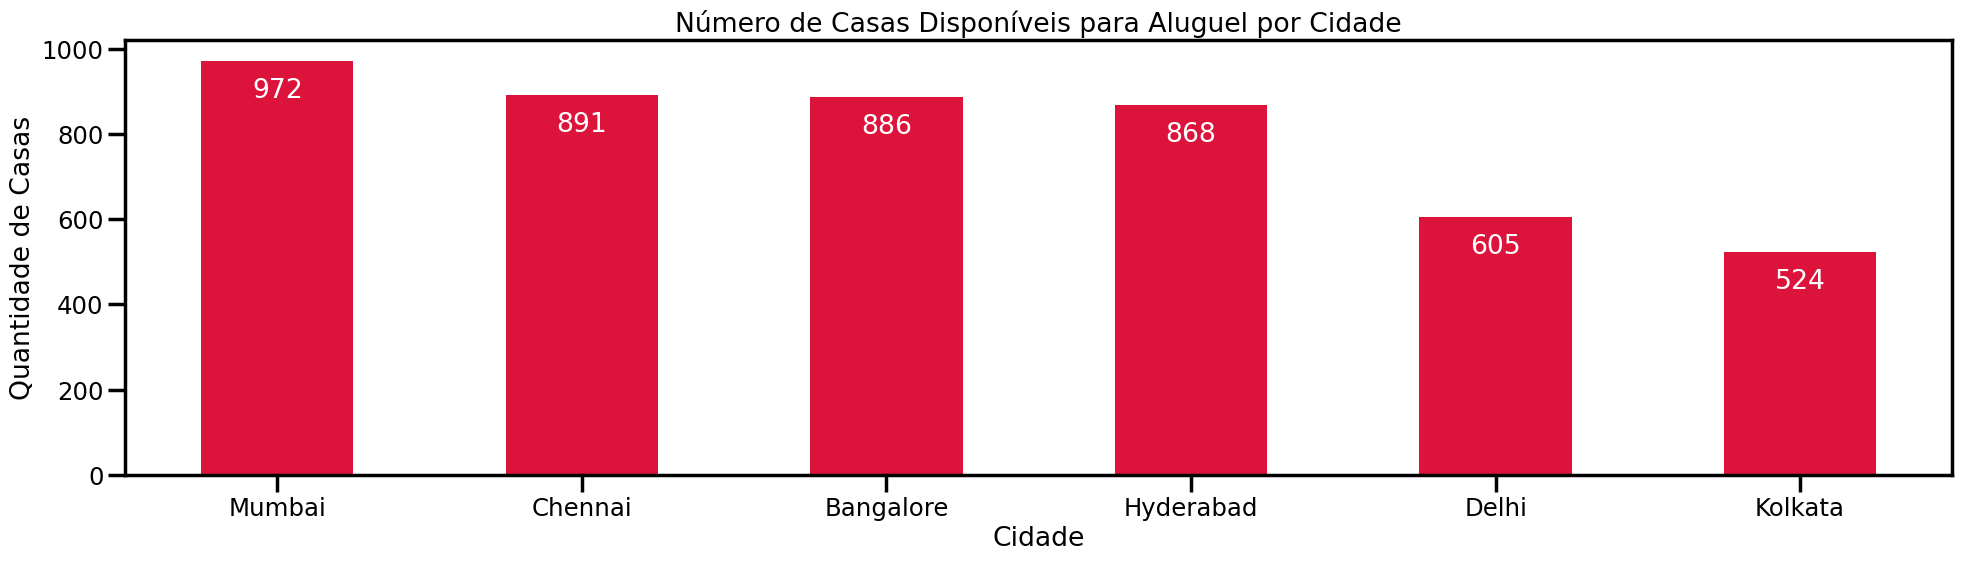

In [45]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["City"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'white')
    

plt.title('Número de Casas Disponíveis para Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Casas')

plt.tight_layout()

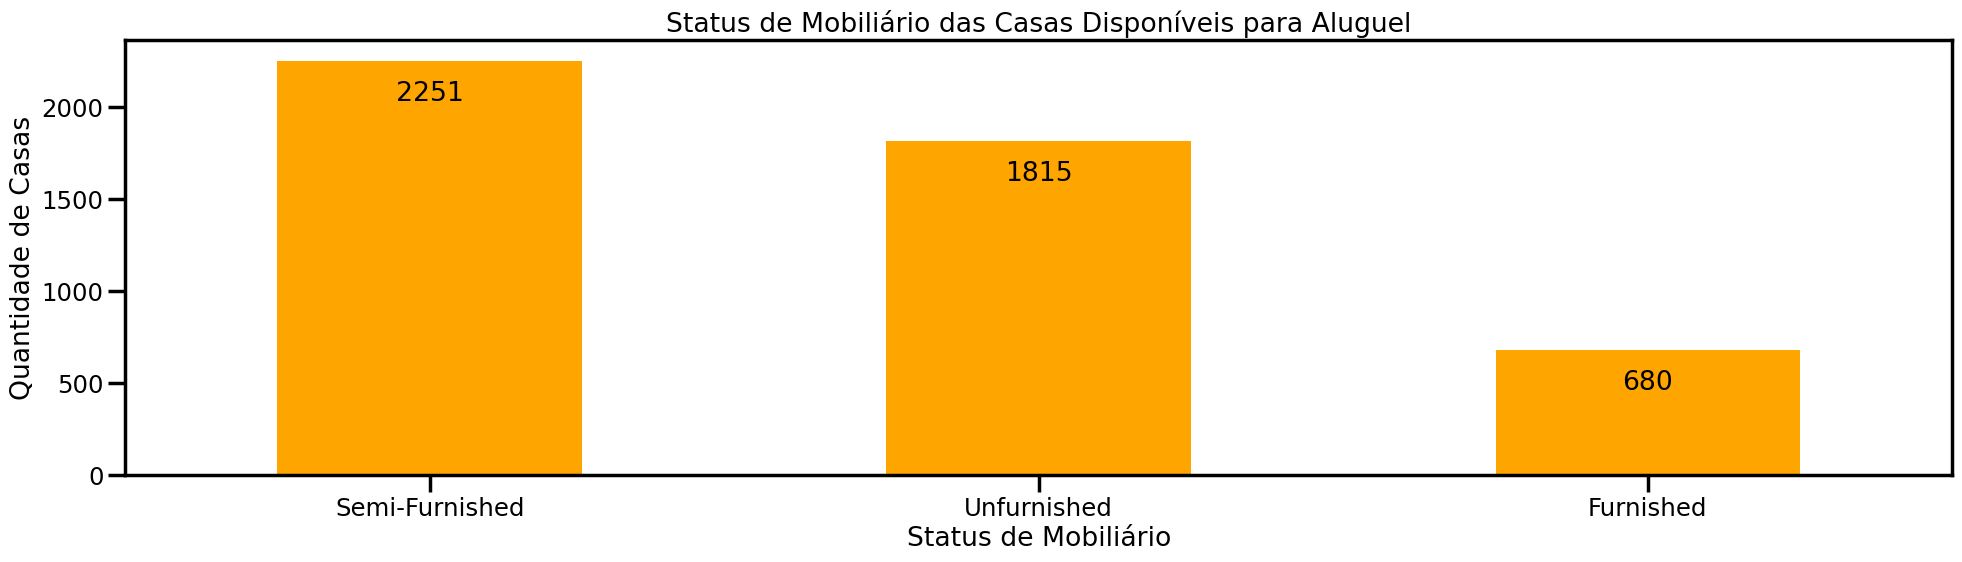

In [46]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["Furnishing Status"].value_counts().plot(kind = 'bar',
                                                      color = "Orange",
                                                      rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

plt.title('Status de Mobiliário das Casas Disponíveis para Aluguel')
plt.xlabel('Status de Mobiliário')
plt.ylabel('Quantidade de Casas')

plt.tight_layout()

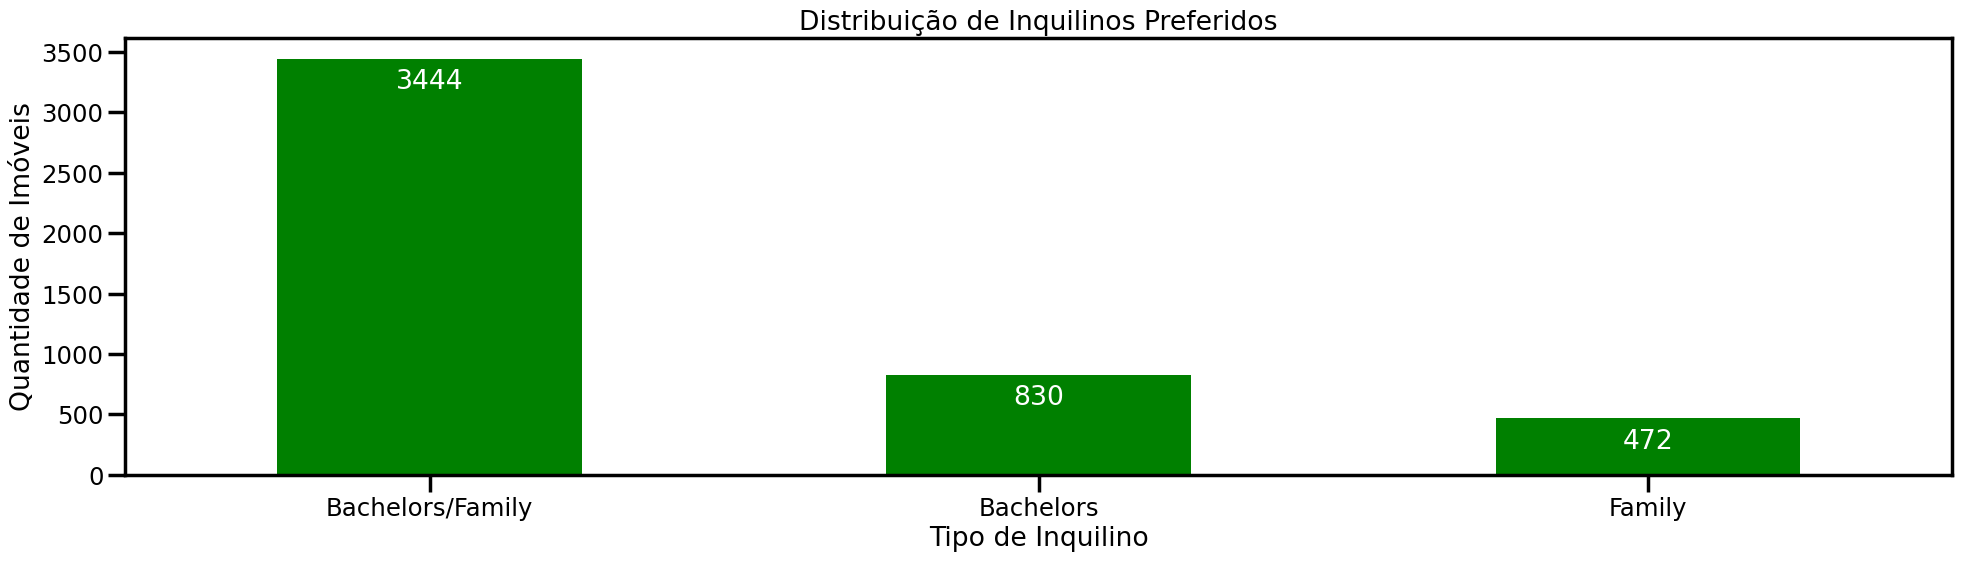

In [47]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300),
                ha = 'center',
                va = 'bottom',
                color = 'White')

plt.title('Distribuição de Inquilinos Preferidos')
plt.xlabel('Tipo de Inquilino')
plt.ylabel('Quantidade de Imóveis')

plt.tight_layout()

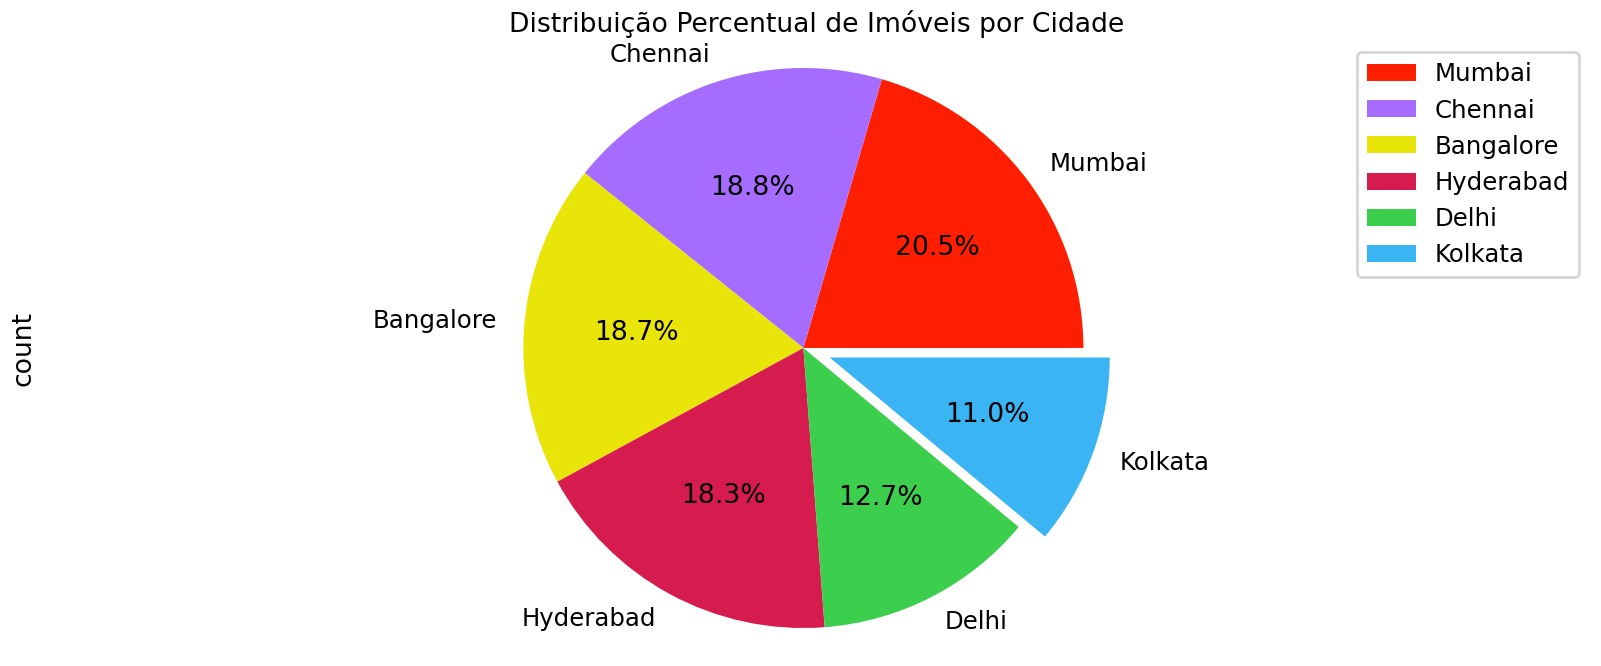

In [48]:
plt.figure(figsize = (20, 8))
counts = dataset["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.title('Distribuição Percentual de Imóveis por Cidade')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

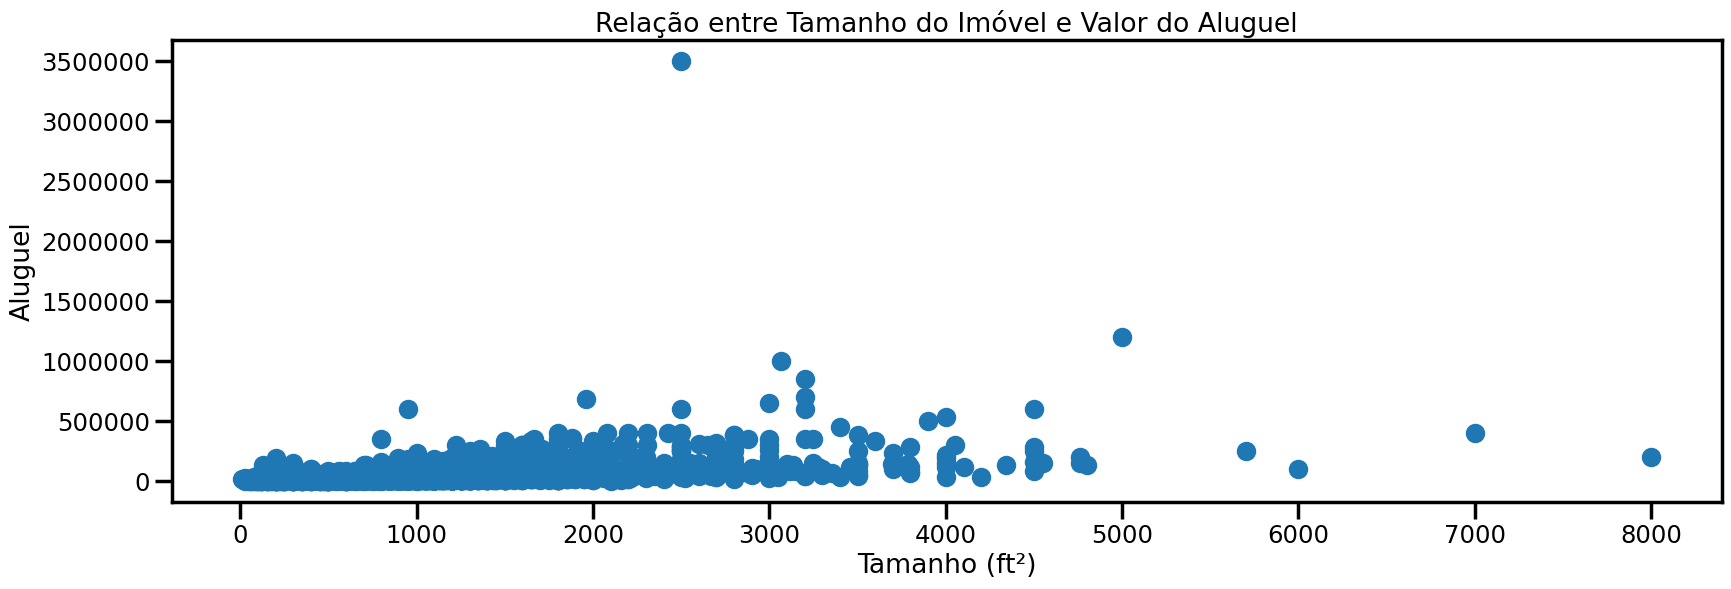

In [49]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(dataset["Size"], dataset["Rent"])
plt.title('Relação entre Tamanho do Imóvel e Valor do Aluguel')
plt.xlabel("Tamanho (ft²)")
plt.ylabel("Aluguel");

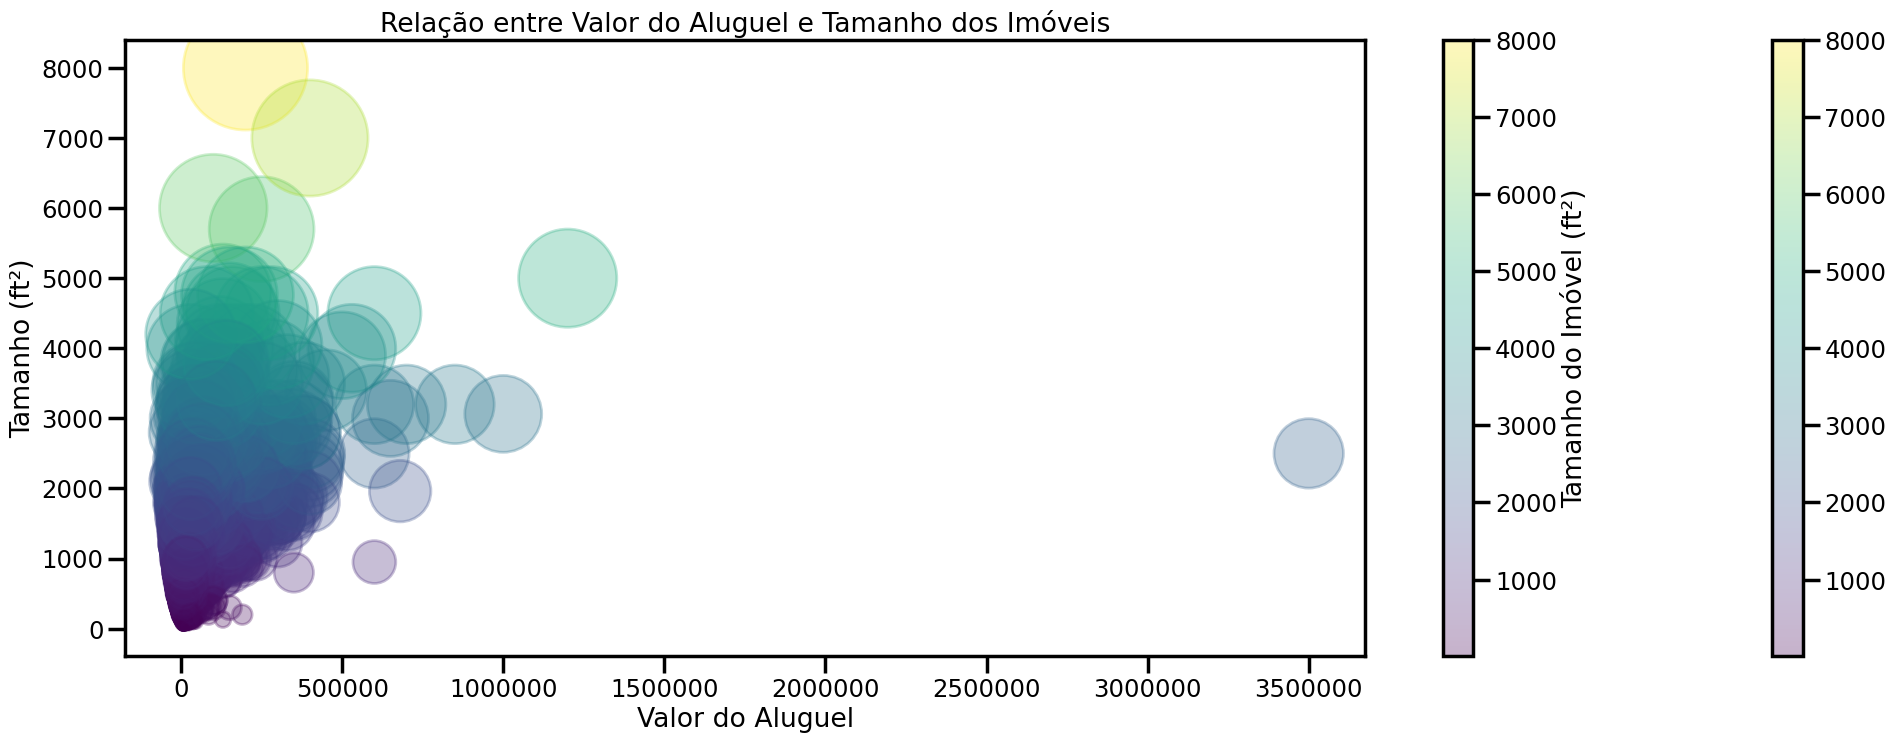

In [50]:
x = dataset["Rent"]
y = dataset["Size"]
colors = dataset["Size"]
sizes = dataset["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

plt.title('Relação entre Valor do Aluguel e Tamanho dos Imóveis')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Tamanho (ft²)')
plt.colorbar(label='Tamanho do Imóvel (ft²)');

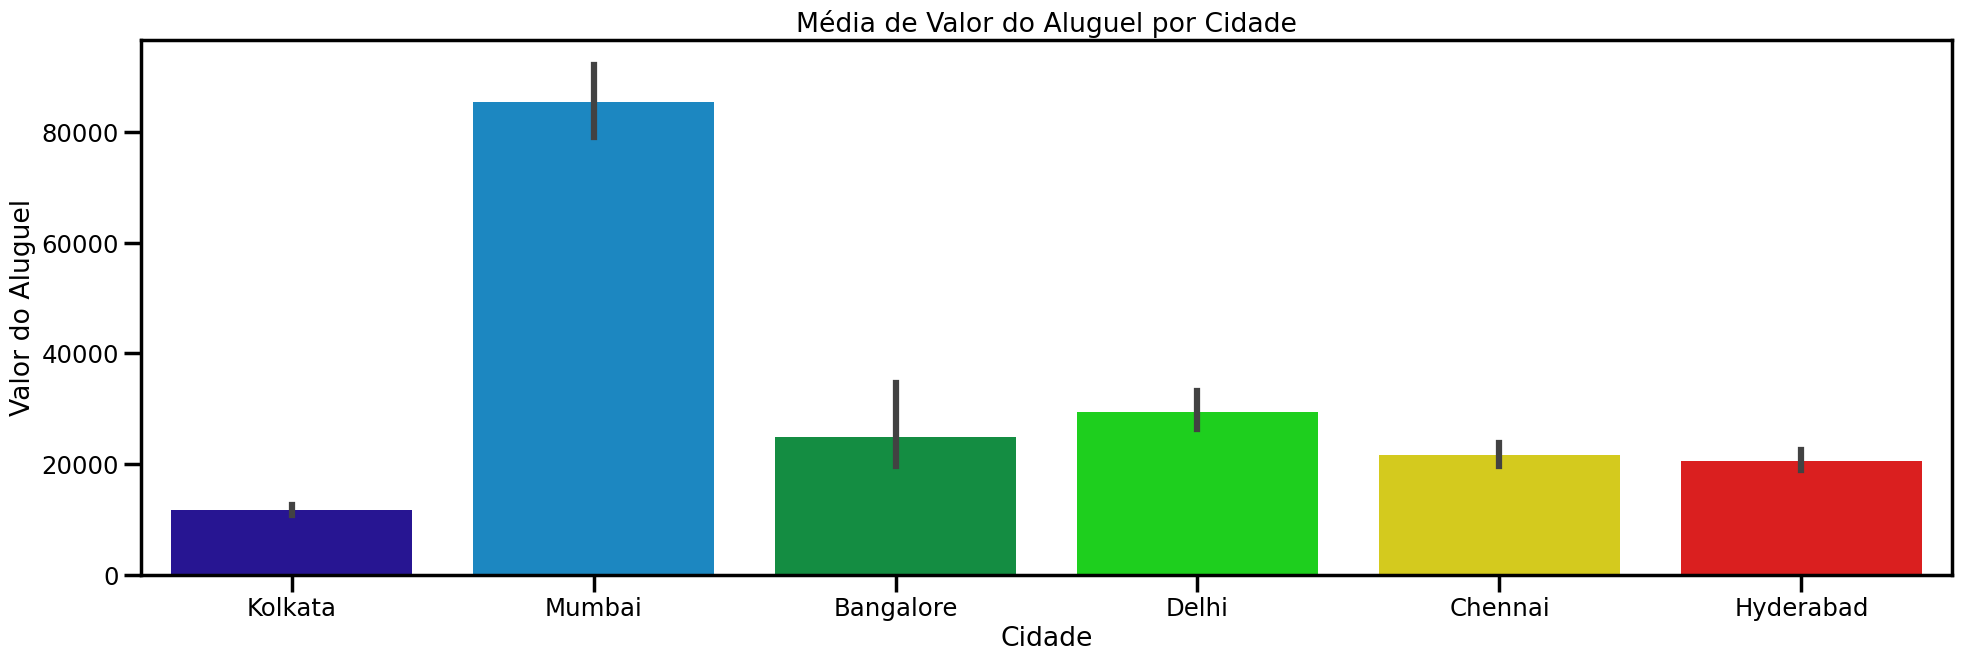

In [51]:
plt.figure(figsize = (20, 7))
sns.barplot(x = dataset["City"], 
            y = dataset["Rent"], 
            hue = dataset["City"],
            palette = "nipy_spectral",
            legend = False);

plt.title('Média de Valor do Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor do Aluguel')
plt.xticks(rotation = 0)
plt.tight_layout()


Text(0, 0.5, 'Frequência')

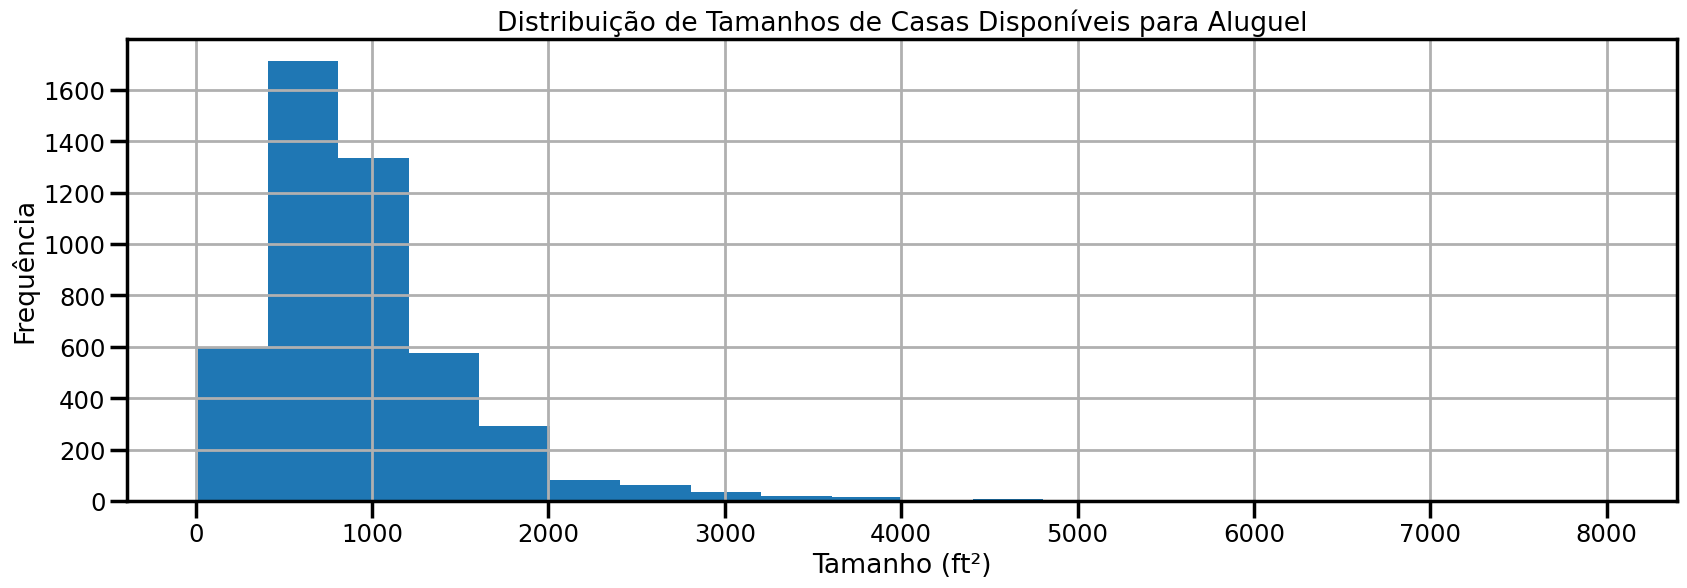

In [52]:

n_bins = 20
plt.figure(figsize = (20, 6))
dataset["Size"].hist(bins = n_bins);

plt.title('Distribuição de Tamanhos de Casas Disponíveis para Aluguel')
plt.xlabel('Tamanho (ft²)')
plt.ylabel('Frequência')


Text(0, 0.5, 'Quantidade de Imóveis')

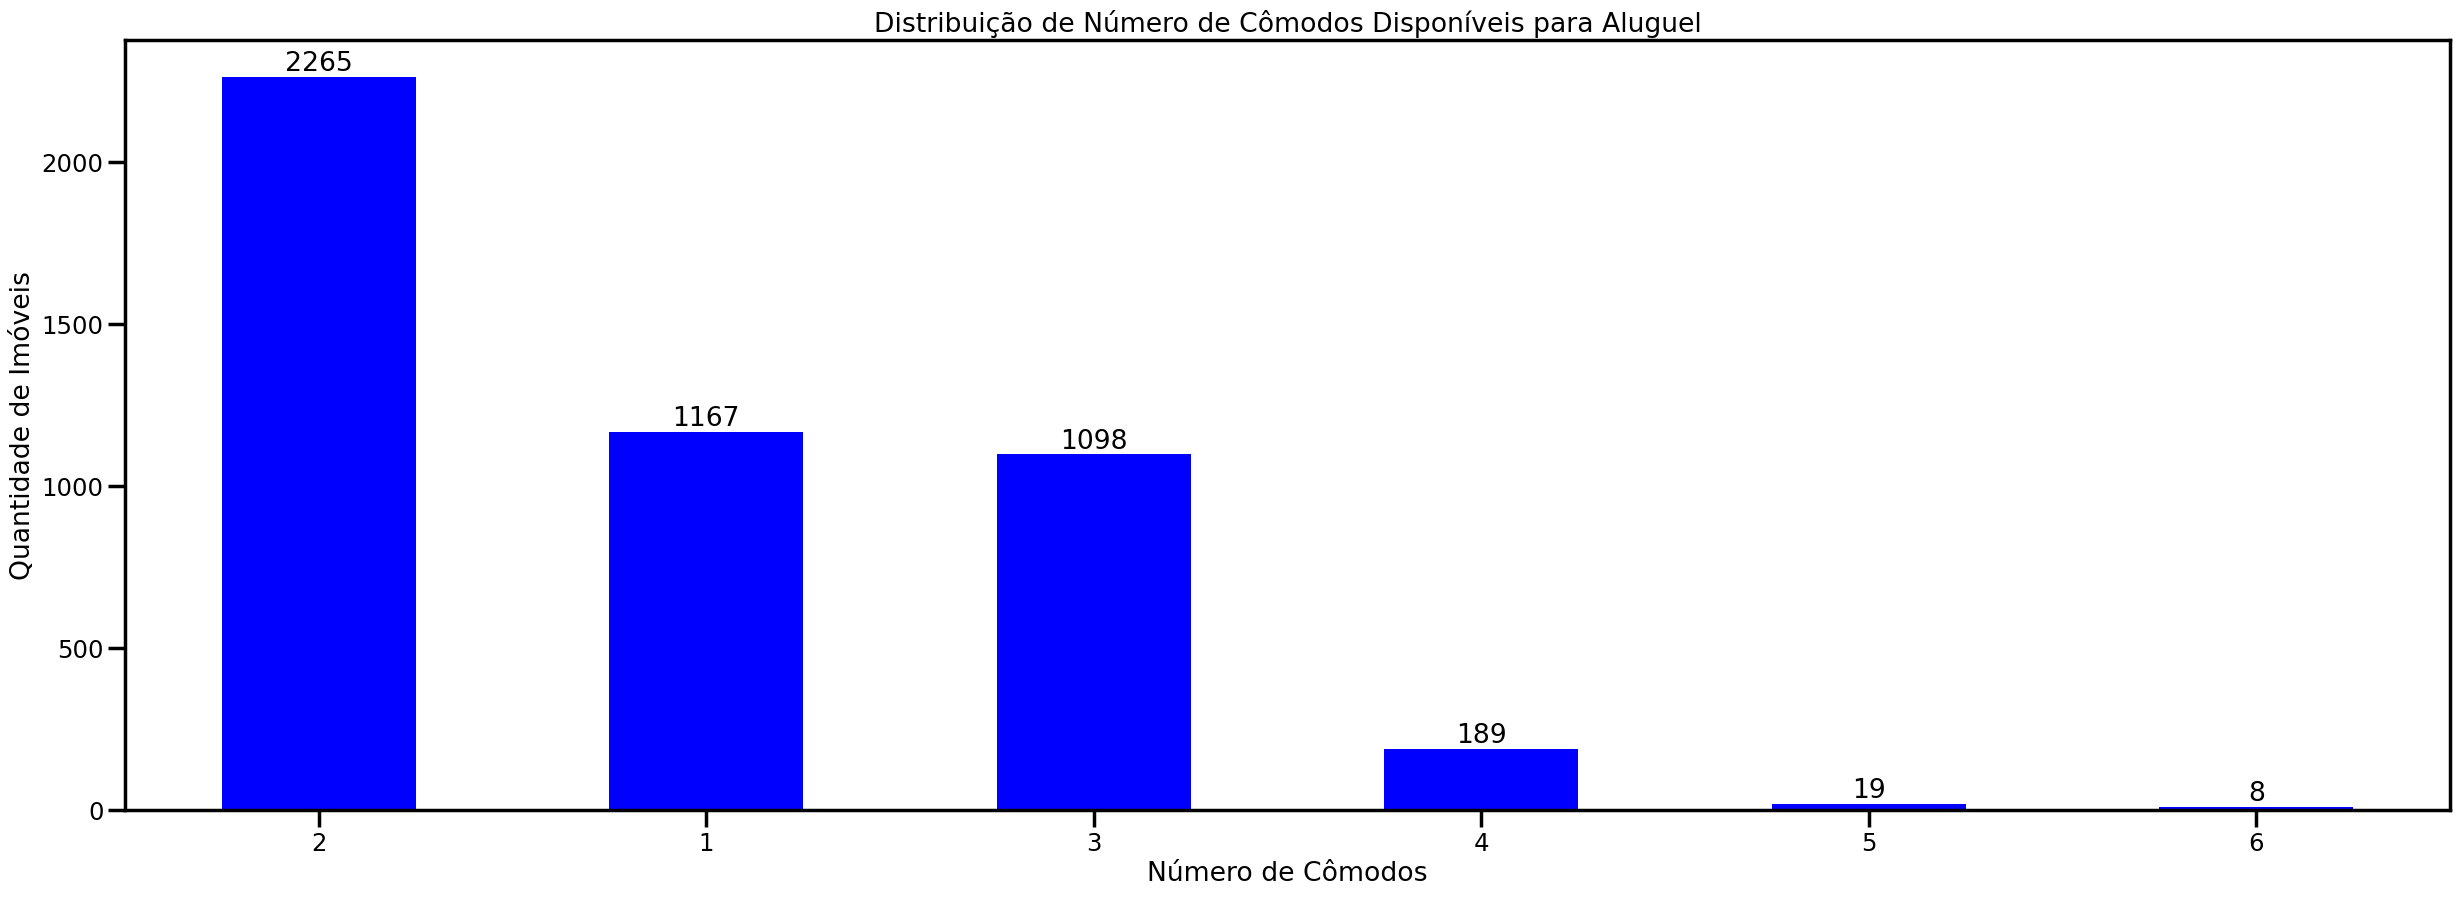

In [53]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = dataset["BHK"].value_counts().plot(kind = 'bar',
                                        color = "Blue",
                                        rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title('Distribuição de Número de Cômodos Disponíveis para Aluguel')
plt.xlabel('Número de Cômodos')
plt.ylabel('Quantidade de Imóveis')

Text(0, 0.5, 'Quantidade de Imóveis')

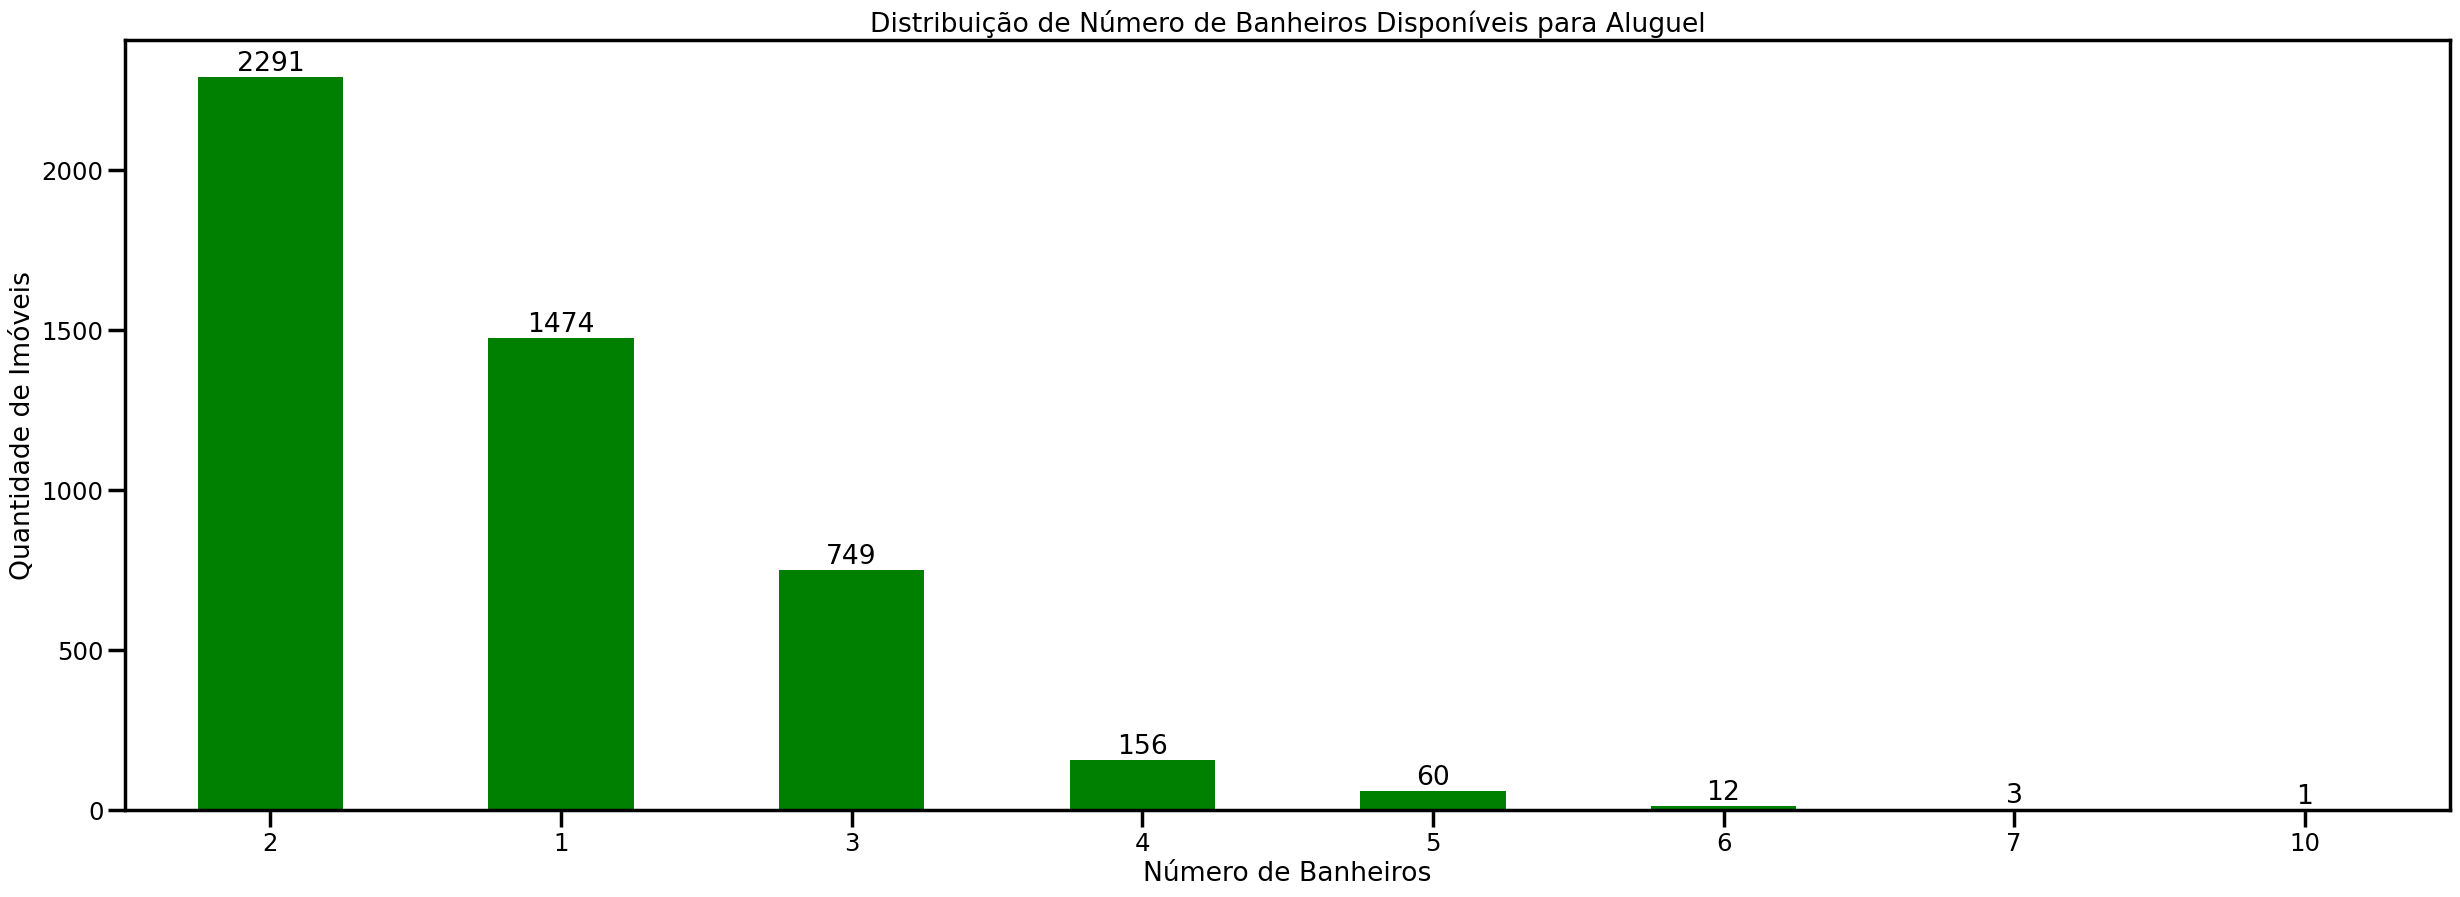

In [54]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = dataset["Bathroom"].value_counts().plot(kind = 'bar',
                                             color = "Green",
                                             rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title('Distribuição de Número de Banheiros Disponíveis para Aluguel')
plt.xlabel('Número de Banheiros')
plt.ylabel('Quantidade de Imóveis')

Text(198.91666666666669, 0.5, 'Número de Cômodos')

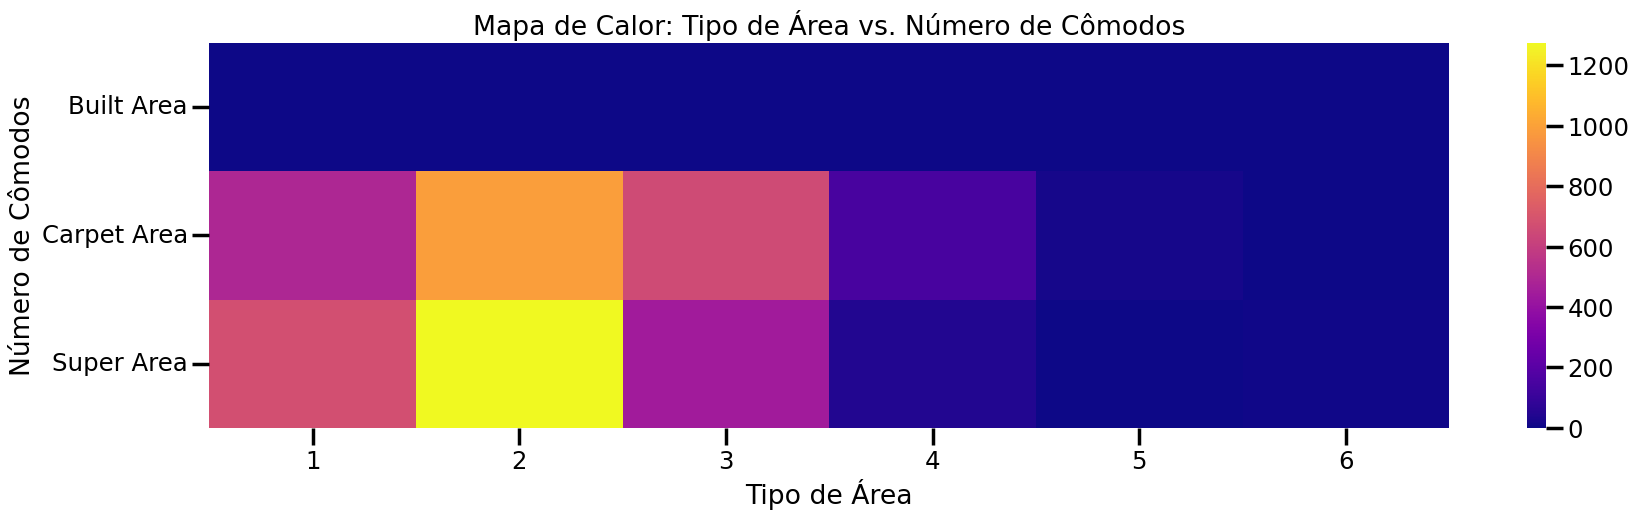

In [55]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(dataset["Area Type"],
                        dataset["BHK"]),
                        cmap = colormap);

plt.title('Mapa de Calor: Tipo de Área vs. Número de Cômodos')
plt.xlabel('Tipo de Área')
plt.ylabel('Número de Cômodos')

### Remoção de outliers


In [56]:
dataset_original_sem_outliers = dataset.copy()
print("Número de linhas antes da remoção dos outliers:", len(dataset_original_sem_outliers))
colunas_para_verificar = ['Rent', 'Size', 'Bathroom', 'BHK']

for col in colunas_para_verificar:
    mean = dataset_original_sem_outliers[col].mean()
    std = dataset_original_sem_outliers[col].std()

    dataset_original_sem_outliers = dataset_original_sem_outliers[(dataset_original_sem_outliers[col] >= mean - 3*std) & (dataset_original_sem_outliers[col] <= mean + 3*std)]

print("Número de linhas após remoção dos outliers:", len(dataset_original_sem_outliers))

Número de linhas antes da remoção dos outliers: 4746
Número de linhas após remoção dos outliers: 4573


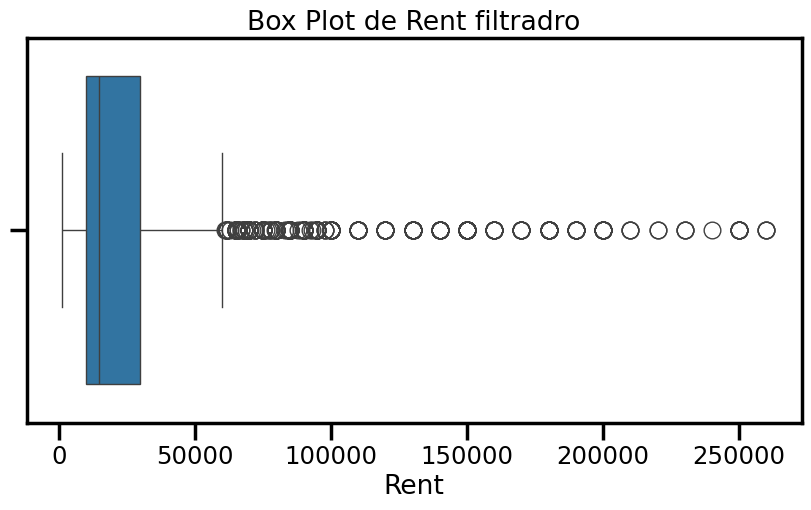

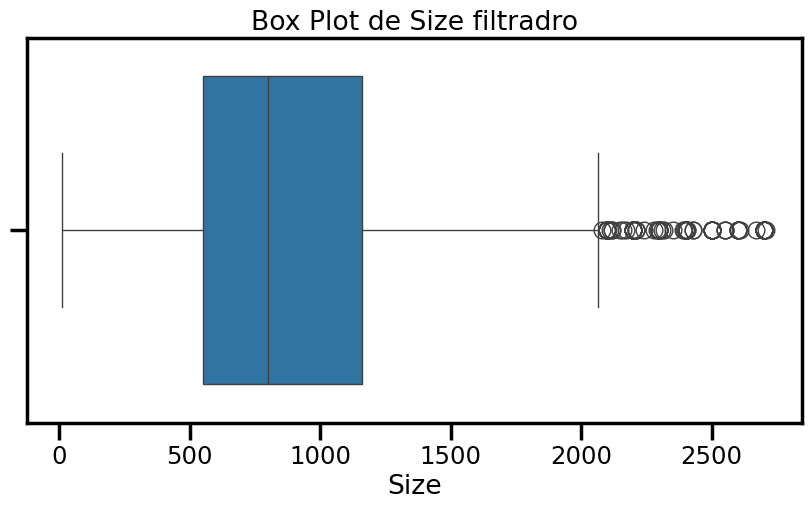

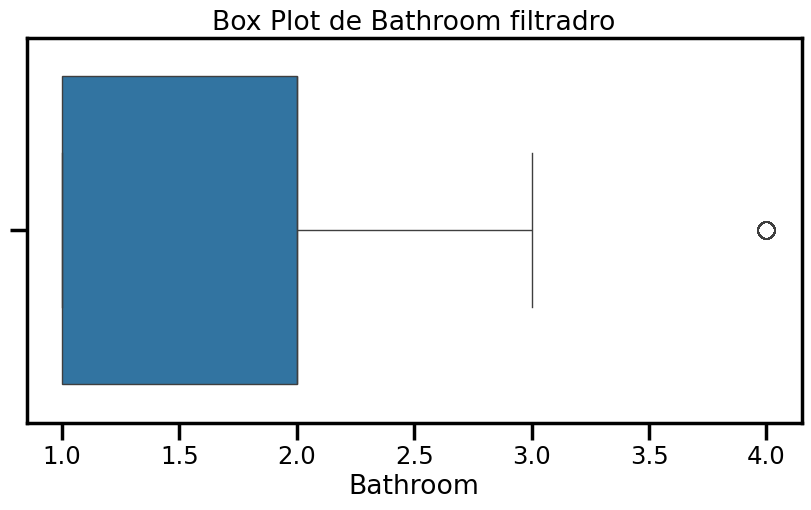

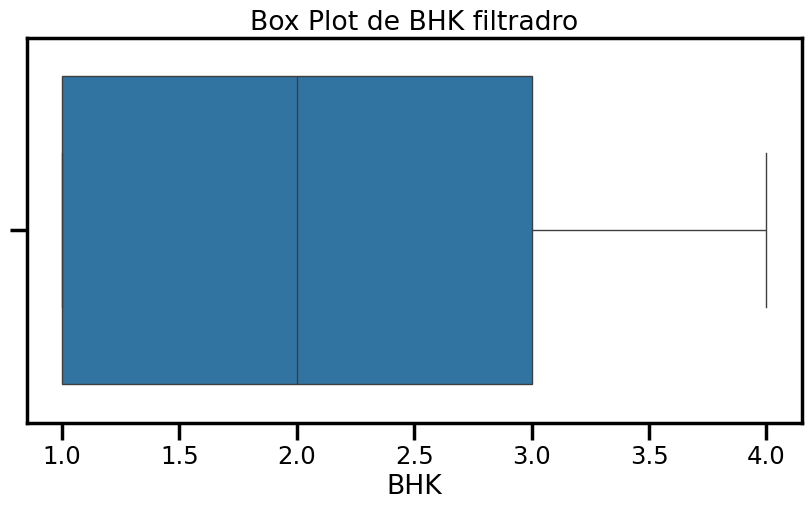

In [57]:
for col in colunas_para_verificar:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = dataset_original_sem_outliers[col])
    plt.title(f'Box Plot de {col} filtradro')
    plt.xlabel(col)
    plt.show()


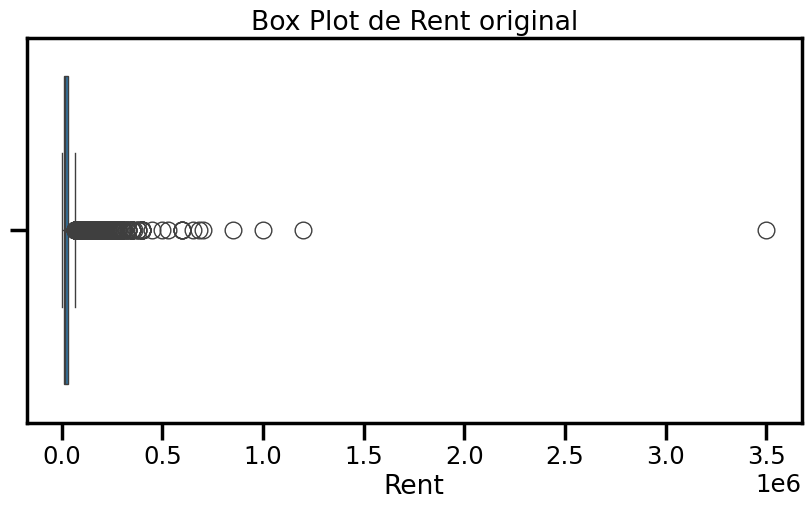

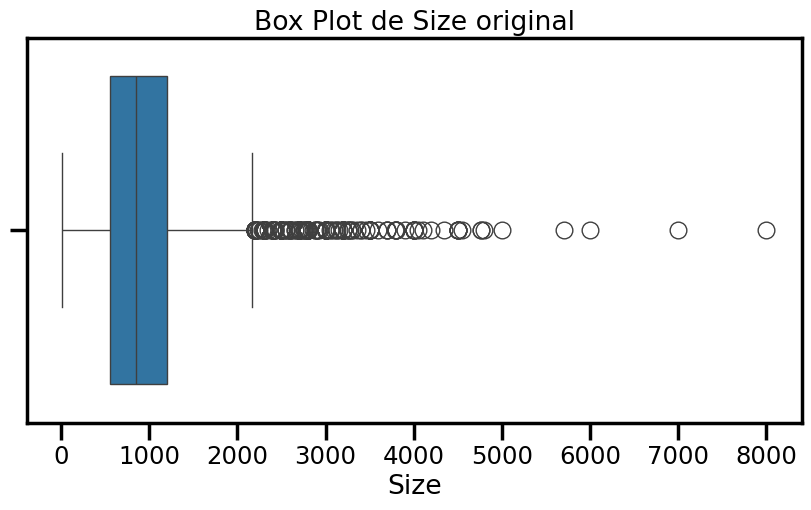

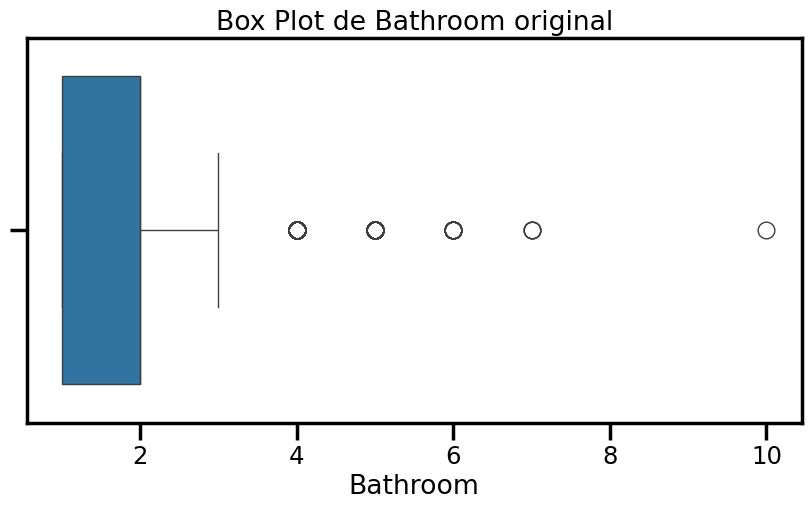

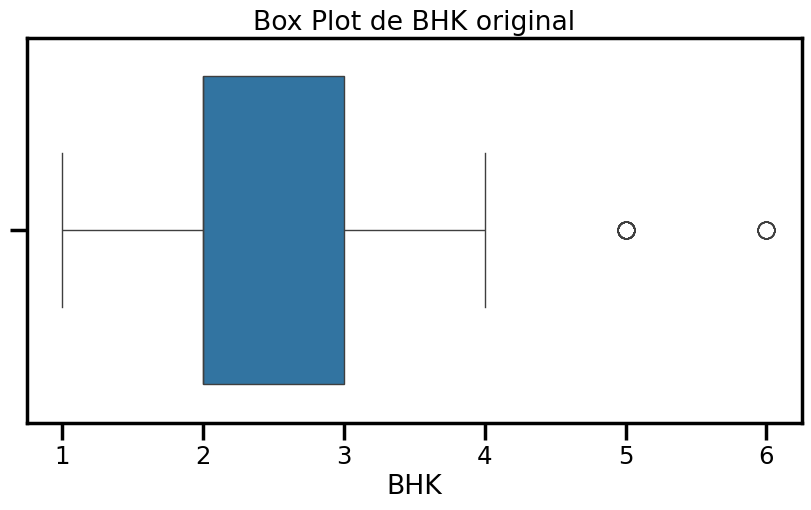

In [58]:
for col in colunas_para_verificar:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = dataset[col])
    plt.title(f'Box Plot de {col} original')
    plt.xlabel(col)
    plt.show()

### Transformação

In [59]:
colunas_categoricas = ['City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact', 'Area Type']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

encoded_features = pd.DataFrame(
    ohe.fit_transform(dataset[colunas_categoricas]).toarray(),
    columns=ohe.get_feature_names_out(colunas_categoricas),
    index=dataset.index
)

dataset_transformado = pd.concat([dataset, encoded_features], axis=1)
dataset_transformado.drop(columns=colunas_categoricas, inplace=True)
dataset_transformado.head()

dataset_transformado_sem_outliers = dataset_transformado.copy()
print("Número de linhas antes da remoção dos outliers:", len(dataset_transformado_sem_outliers))
colunas_para_verificar = ['Rent', 'Size', 'Bathroom', 'BHK']
for col in colunas_para_verificar:
    mean = dataset_transformado_sem_outliers[col].mean()
    std = dataset_transformado_sem_outliers[col].std()

    dataset_transformado_sem_outliers = dataset_transformado_sem_outliers[(dataset_transformado_sem_outliers[col] >= mean - 3*std) & (dataset_transformado_sem_outliers[col] <= mean + 3*std)]
print("Número de linhas após remoção dos outliers:", len(dataset_transformado_sem_outliers))


Número de linhas antes da remoção dos outliers: 4746
Número de linhas após remoção dos outliers: 4573


In [60]:
dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### Matriz de confusão

In [61]:
plt.figure(figsize=(100, 75))

numeric_cols = dataset_transformado.select_dtypes(include=['float64', 'int64']).columns

dataset_int = dataset_transformado.copy()
for col in numeric_cols:
    dataset_int[col] = dataset_int[col].astype(int)

corr_matrix = dataset_int[numeric_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de correlação", fontsize=100, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=60) 
plt.yticks(fontsize=60) 

plt.tight_layout()
plt.show()

# Aplicação dos modelos

In [62]:

# (i)dataset : dataset
# (ii)dataset_original_sem_outliers : dataset_original_sem_outliers
# (iii)dataset_transformado : dataset_transformado
# (iv) dataset_transformado_sem_outliers : dataset_transformado_sem_outliers
scaler = RobustScaler()

numeric_cols_1 = dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_2 = dataset_original_sem_outliers.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_3 = dataset_transformado.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_4 = dataset_transformado_sem_outliers.select_dtypes(include=['float64', 'int64']).columns


dataset_1 = dataset.copy()
dataset_2 = dataset_original_sem_outliers.copy()
dataset_3 = dataset_transformado.copy()
dataset_4 = dataset_transformado_sem_outliers.copy()

for col in numeric_cols_1:
    dataset_1[col] = dataset_1[col].astype(int)

for col in numeric_cols_2:
    dataset_2[col] = dataset_2[col].astype(int)

for col in numeric_cols_3:
    dataset_3[col] = dataset_3[col].astype(int)

for col in numeric_cols_4:
    dataset_4[col] = dataset_4[col].astype(int)


# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


test_size = 0.1

X_1 = dataset_1.drop(columns=['Rent', 'Posted On', 'Floor', 'Area Locality', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], axis=1)
y_1 = dataset_1['Rent']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=test_size)
#X_train_1 = scaler.fit_transform(X_train_1)
#X_test_1 = scaler.transform(X_test_1)

X_2 = dataset_2.drop(columns=['Rent', 'Posted On', 'Floor', 'Area Locality', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], axis=1)
y_2 = dataset_2['Rent']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=test_size)
#X_train_2 = scaler.fit_transform(X_train_2)
#X_test_2 = scaler.transform(X_test_2)

X_3 = dataset_3.drop(columns=['Rent', 'Posted On', 'Floor', 'Area Locality'], axis=1)
y_3 = dataset_3['Rent']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=test_size)
#X_train_3 = scaler.fit_transform(X_train_3)
#X_test_3 = scaler.transform(X_test_3)

X_4 = dataset_4.drop(columns=['Rent', 'Posted On', 'Floor', 'Area Locality'], axis=1)
y_4 = dataset_4['Rent']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=test_size)
#X_train_4 = scaler.fit_transform(X_train_4)
#X_test_4 = scaler.transform(X_test_4)

X_4.head()


,BHK,Size,Bathroom,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Area Type_Carpet Area,Area Type_Super Area
0,2,1100,2,0,0,0,1,0,0,1,1,0,0,1,0,1
1,2,800,1,0,0,0,1,0,1,0,1,0,0,1,0,1
2,2,1000,1,0,0,0,1,0,1,0,1,0,0,1,0,1
3,2,800,1,0,0,0,1,0,0,1,1,0,0,1,0,1
4,2,850,1,0,0,0,1,0,0,1,0,0,0,1,1,0


## Regressão linear

In [63]:
linear_model = LinearRegression()

### Regressão linear para base de dados (i) dataset original

In [64]:
linear_model.fit(X_train_1, y_train_1)
linear_score_1 = linear_model.score(X_test_1, y_test_1)
print(f"R² do modelo de regressão linear (dataset original): {linear_score_1:.2f}")
pred_train_1 = linear_model.predict(X_train_1)
pred_test_1 = linear_model.predict(X_test_1)
y_train_orig_1 = y_train_1
y_test_orig_1 = y_test_1

print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_1, pred_train_1)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_1, pred_train_1)}")
print(f"RSQ: {r2_score(y_train_orig_1, pred_train_1)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_1, pred_train_1))} mean:{int(dataset_1.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_1, pred_test_1)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_1, pred_test_1)}")
print(f"RSQ: {r2_score(y_test_orig_1, pred_test_1)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_1, pred_test_1))} mean:{int(dataset_1.Rent.mean())}")


R² do modelo de regressão linear (dataset original): 0.36
Train
MSE: 5130709633.074969
MAPE: 1.2718697961048944
RSQ: 0.20339932571128494
RMSE: 71628.97202302271 mean:34993

Test
MSE: 1926579665.251597
MAPE: 1.362362968618376
RSQ: 0.36397396298500784
RMSE: 43892.820201618364 mean:34993


### Regressão linear para base de dados (ii) dataset original sem outliers

In [65]:
linear_model.fit(X_train_2, y_train_2)
linear_score_2 = linear_model.score(X_test_2, y_test_2)
print(f"R² do modelo de regressão linear (dataset original sem outliers): {linear_score_2:.2f}")
pred_train_2 = linear_model.predict(X_train_2)
pred_test_2 = linear_model.predict(X_test_2)
y_train_orig_2 = y_train_2
y_test_orig_2 = y_test_2
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_2, pred_train_2)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_2, pred_train_2)}")
print(f"RSQ: {r2_score(y_train_orig_2, pred_train_2)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_2, pred_train_2))} mean:{int(dataset_2.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_2, pred_test_2)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_2, pred_test_2)}")
print(f"RSQ: {r2_score(y_test_orig_2, pred_test_2)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_2, pred_test_2))} mean:{int(dataset_2.Rent.mean())}")

R² do modelo de regressão linear (dataset original sem outliers): 0.28
Train
MSE: 753698760.5142211
MAPE: 0.8113049237416573
RSQ: 0.2921285874588271
RMSE: 27453.574640003095 mean:27128

Test
MSE: 740171682.4311017
MAPE: 0.7869829309241597
RSQ: 0.2847501374403958
RMSE: 27206.09642030811 mean:27128


### Regressão linear para base de dados (iii) dataset transformada com outliers

In [66]:
linear_model.fit(X_train_3, y_train_3)
linear_score_3 = linear_model.score(X_test_3, y_test_3)
print(f"R² do modelo de regressão linear (dataset transformada com outliers): {linear_score_3:.2f}")
pred_train_3 = linear_model.predict(X_train_3)
pred_test_3 = linear_model.predict(X_test_3)
y_train_orig_3 = y_train_3
y_test_orig_3 = y_test_3
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_3, pred_train_3)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_3, pred_train_3)}")
print(f"RSQ: {r2_score(y_train_orig_3, pred_train_3)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_3, pred_train_3))} mean:{int(dataset_3.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_3, pred_test_3)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_3, pred_test_3)}")
print(f"RSQ: {r2_score(y_test_orig_3, pred_test_3)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_3, pred_test_3))} mean:{int(dataset_3.Rent.mean())}")

R² do modelo de regressão linear (dataset transformada com outliers): 0.50
Train
MSE: 4430352398.911144
MAPE: 1.1702742504727839
RSQ: 0.3050666742168089
RMSE: 66560.89241372253 mean:34993

Test
MSE: 1794786016.9225247
MAPE: 1.274754958906209
RSQ: 0.5034584944289855
RMSE: 42364.91492877714 mean:34993


### Regressão linear para base de dados (iv) dataset transformada sem outliers

In [67]:
linear_model.fit(X_train_4, y_train_4)
linear_score_4 = linear_model.score(X_test_4, y_test_4)
print(f"R² do modelo de regressão linear (dataset transformada sem outliers): {linear_score_4:.2f}")
pred_train_4 = linear_model.predict(X_train_4)
pred_test_4 = linear_model.predict(X_test_4)
y_train_orig_4 = y_train_4
y_test_orig_4 = y_test_4
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_4, pred_train_4)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_4, pred_train_4)}")
print(f"RSQ: {r2_score(y_train_orig_4, pred_train_4)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_4, pred_train_4))} mean:{int(dataset_4.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_4, pred_test_4)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_4, pred_test_4)}")
print(f"RSQ: {r2_score(y_test_orig_4, pred_test_4)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_4, pred_test_4))} mean:{int(dataset_4.Rent.mean())}")

R² do modelo de regressão linear (dataset transformada sem outliers): 0.60
Train
MSE: 416566639.4851184
MAPE: 0.673295853148251
RSQ: 0.604485301020341
RMSE: 20409.964220574184 mean:27128

Test
MSE: 451320769.6217828
MAPE: 0.6910460499158364
RSQ: 0.6031864610708639
RMSE: 21244.311464996525 mean:27128


## Random Forest 

In [68]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

### Random forest para base de dados (i) dataset original

In [69]:
rf_model.fit(X_train_1, y_train_1)
rf_score_1 = rf_model.score(X_test_1, y_test_1)
print(f"R² do modelo Random Forest (dataset original): {rf_score_1:.2f}")
pred_train_rf_1 = rf_model.predict(X_train_1)
pred_test_rf_1 = rf_model.predict(X_test_1)
y_train_orig_rf_1 = y_train_1
y_test_orig_rf_1 = y_test_1
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_rf_1, pred_train_rf_1)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_rf_1, pred_train_rf_1)}")
print(f"RSQ: {r2_score(y_train_orig_rf_1, pred_train_rf_1)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_rf_1, pred_train_rf_1))} mean:{int(dataset_1.Rent.mean())}")


print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_rf_1, pred_test_rf_1)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_rf_1, pred_test_rf_1)}")
print(f"RSQ: {r2_score(y_test_orig_rf_1, pred_test_rf_1)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_rf_1, pred_test_rf_1))} mean:{int(dataset_1.Rent.mean())}")

R² do modelo Random Forest (dataset original): 0.51
Train
MSE: 3061144634.82813
MAPE: 0.604055008610002
RSQ: 0.5247226885576242
RMSE: 55327.61186630171 mean:34993

Test
MSE: 1482452767.8794932
MAPE: 0.7288137789294895
RSQ: 0.5105945650614104
RMSE: 38502.63325903169 mean:34993


### Random forest para base de dados (ii) dataset sem outliers

In [70]:
rf_model.fit(X_train_2, y_train_2)
rf_score_2 = rf_model.score(X_test_2, y_test_2)
print(f"R² do modelo Random Forest (dataset original sem outliers): {rf_score_2:.2f}")
pred_train_rf_2 = rf_model.predict(X_train_2)
pred_test_rf_2 = rf_model.predict(X_test_2)
y_train_orig_rf_2 = y_train_2
y_test_orig_rf_2 = y_test_2
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_rf_2, pred_train_rf_2)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_rf_2, pred_train_rf_2)}")
print(f"RSQ: {r2_score(y_train_orig_rf_2, pred_train_rf_2)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_rf_2, pred_train_rf_2))} mean:{int(dataset_2.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_rf_2, pred_test_rf_2)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_rf_2, pred_test_rf_2)}")
print(f"RSQ: {r2_score(y_test_orig_rf_2, pred_test_rf_2)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_rf_2, pred_test_rf_2))} mean:{int(dataset_2.Rent.mean())}")

R² do modelo Random Forest (dataset original sem outliers): 0.31
Train
MSE: 463887445.6288987
MAPE: 0.5819207952538528
RSQ: 0.5643184272010632
RMSE: 21538.04646733075 mean:27128

Test
MSE: 716583625.3478321
MAPE: 0.7057341444225381
RSQ: 0.3075439770148073
RMSE: 26769.07965074317 mean:27128


### Random forest para base de dados (iii) dataset transformado com outliers

In [71]:
rf_model.fit(X_train_3, y_train_3)
rf_score_3 = rf_model.score(X_test_3, y_test_3)
print(f"R² do modelo Random Forest (dataset transformada com outliers): {rf_score_3:.2f}")
pred_train_rf_3 = rf_model.predict(X_train_3)
pred_test_rf_3 = rf_model.predict(X_test_3)
y_train_orig_rf_3 = y_train_3
y_test_orig_rf_3 = y_test_3
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_rf_3, pred_train_rf_3)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_rf_3, pred_train_rf_3)}")
print(f"RSQ: {r2_score(y_train_orig_rf_3, pred_train_rf_3)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_rf_3, pred_train_rf_3))} mean:{int(dataset_3.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_rf_3, pred_test_rf_3)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_rf_3, pred_test_rf_3)}")
print(f"RSQ: {r2_score(y_test_orig_rf_3, pred_test_rf_3)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_rf_3, pred_test_rf_3))} mean:{int(dataset_3.Rent.mean())}")

R² do modelo Random Forest (dataset transformada com outliers): 0.68
Train
MSE: 837689395.0812036
MAPE: 0.19347332412495205
RSQ: 0.8686022634587345
RMSE: 28942.86432060938 mean:34993

Test
MSE: 1152088663.6187012
MAPE: 0.44621006370905075
RSQ: 0.6812657140234328
RMSE: 33942.43161028245 mean:34993


### Random forest para base de dados (iv) dataset transformado sem outliers


In [72]:
rf_model.fit(X_train_4, y_train_4)
rf_score_4 = rf_model.score(X_test_4, y_test_4)
print(f"R² do modelo Random Forest (dataset transformada sem outliers): {rf_score_4:.2f}")
pred_train_rf_4 = rf_model.predict(X_train_4)
pred_test_rf_4 = rf_model.predict(X_test_4)
y_train_orig_rf_4 = y_train_4
y_test_orig_rf_4 = y_test_4
print("Train")
print(f"MSE: {mean_squared_error(y_train_orig_rf_4, pred_train_rf_4)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_orig_rf_4, pred_train_rf_4)}")
print(f"RSQ: {r2_score(y_train_orig_rf_4, pred_train_rf_4)}")
print(f"RMSE: {sqrt(mean_squared_error(y_train_orig_rf_4, pred_train_rf_4))} mean:{int(dataset_4.Rent.mean())}")
print("\nTest")
print(f"MSE: {mean_squared_error(y_test_orig_rf_4, pred_test_rf_4)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_orig_rf_4, pred_test_rf_4)}")
print(f"RSQ: {r2_score(y_test_orig_rf_4, pred_test_rf_4)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test_orig_rf_4, pred_test_rf_4))} mean:{int(dataset_4.Rent.mean())}")

R² do modelo Random Forest (dataset transformada sem outliers): 0.79
Train
MSE: 58780510.51499019
MAPE: 0.17550607282677622
RSQ: 0.9441900677621652
RMSE: 7666.844886587323 mean:27128

Test
MSE: 238844279.31435618
MAPE: 0.4037326966084936
RSQ: 0.7900015906488556
RMSE: 15454.587646209011 mean:27128
